# **DATA TRANSACTIONS && İMPORT LİBRARY**

In [87]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report , mean_absolute_error , mean_squared_error

from sklearn import model_selection
from warnings import filterwarnings
filterwarnings('ignore')

from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

import tensorflow as tf
from tensorflow import keras

file_path = '/content/PSSP.xlsx'  # Burada veri setinizin tam yolunu kullanın
data = pd.read_excel(file_path)

In [88]:
# Veri setinin ilk birkaç satırını görüntüleyin
print(data.head())
#data.dropna(subset=['Sınıflar'], inplace=True)
# Veri setinin genel özeti
print(data.describe())
# Eksik veri kontrolü
print(data.isnull().sum())
data = data.fillna('z')
data['Sınıflar'] = data['Sınıflar'].astype(str)

     ID                   Seq             Structure Sınıflar
0  1FV1  NPVVHFFKNIVTPRTPPPSQ  CCCCCBCCCCCCCCCCCCCC        C
1  1LM8  DLDLEMLAPYIPMDDDFQLR  CCCCCCCCCBCCSCCCEECC        B
2  1O06  EEDPDLKAAIQESLREAEEA  CCCHHHHHHHHHHHHHHHTC        S
3  1QOW  CTFTLPGGGGVCTLTSECI*  CCTTSCTTCSSTTSSTTCCC        E
4  1RDQ  TTYADFIASGRTGRRNAIHD  CHHHHHHTSSCSSCCCCEEC        T
          ID                   Seq                             Structure  \
count   2399                  2399                                  2400   
unique  2288                  2399                                  2393   
top     5B66  NPVVHFFKNIVTPRTPPPSQ  CCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCC   
freq      13                     1                                     2   

       Sınıflar  
count         8  
unique        8  
top           C  
freq          1  
ID              1
Seq             1
Structure       0
Sınıflar     2392
dtype: int64


# **EIIP**

In [89]:
eiip_values = {
    'A': 0.0373, 'R': 0.0959, 'N': 0.0036, 'D': 0.1263,
    'C': 0.0829, 'Q': 0.0761, 'E': 0.0058, 'G': 0.0050,
    'H': 0.0242, 'I': 0.0000, 'L': 0.0000, 'K': 0.0371,
    'M': 0.0823, 'F': 0.0946, 'P': 0.0198, 'S': 0.0829,
    'T': 0.0941, 'W': 0.0548, 'Y': 0.0516, 'V': 0.0057
}

# EIIP kodlama fonksiyonu
def eiip_encode(sequence):
    return [eiip_values.get(aa, 0) for aa in sequence]

# Veri setindeki protein dizilimlerini EIIP ile sayısallaştırma
data['EIIP_Encoded'] = data['Seq'].apply(eiip_encode)

# Özellik mühendisliği fonksiyonu
def extract_features(eiip_list):
    return [np.mean(eiip_list), np.std(eiip_list), np.min(eiip_list), np.max(eiip_list)]


# Sayısallaştırılmış verilerin bir kısmını görüntüleme
print(data[['Seq', 'EIIP_Encoded']].head())



                    Seq                                       EIIP_Encoded
0  NPVVHFFKNIVTPRTPPPSQ  [0.0036, 0.0198, 0.0057, 0.0057, 0.0242, 0.094...
1  DLDLEMLAPYIPMDDDFQLR  [0.1263, 0.0, 0.1263, 0.0, 0.0058, 0.0823, 0.0...
2  EEDPDLKAAIQESLREAEEA  [0.0058, 0.0058, 0.1263, 0.0198, 0.1263, 0.0, ...
3  CTFTLPGGGGVCTLTSECI*  [0.0829, 0.0941, 0.0946, 0.0941, 0.0, 0.0198, ...
4  TTYADFIASGRTGRRNAIHD  [0.0941, 0.0941, 0.0516, 0.0373, 0.1263, 0.094...


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# EIIP_Fixed sütununu numpy array'e dönüştürme
X = np.array(data['EIIP_Encoded'].tolist())
y = data['Sınıflar'].values

# Eğitim ve test setlerine ayırma

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.array([extract_features(eiip_list) for eiip_list in X_train])
X_test = np.array([extract_features(eiip_list) for eiip_list in X_test])

In [91]:
y_test = y_test.reshape(-1)
y_train = y_train.reshape(-1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1920, 4)
(480, 4)
(1920,)
(480,)


In [92]:
# LabelEncoder'ı kullanarak etiketleme işlemi
label_encoder = LabelEncoder()
data['Sınıflar'] = label_encoder.fit_transform(data['Sınıflar'])

# **EIIP && NAİVE BAYES**

Naive Bayes Modeli Performansı:
Doğruluk:  1.0
F1 Skoru:  1.0
Kesinlik:  1.0
Duyarlılık:  1.0
Karmaşıklık Matrisi:
 [[480]]


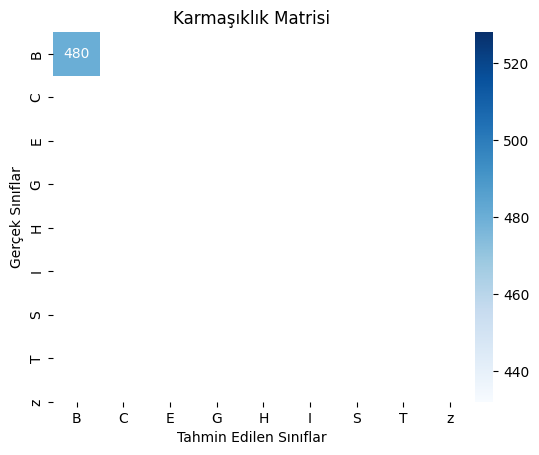

In [93]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
# Naive Bayes modelini eğitme
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
nb_predictions = nb_model.predict(X_test)

# Performans metriklerini hesaplama
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)

# Performans metriklerini yazdırma
print("Naive Bayes Modeli Performansı:")
print("Doğruluk: ", nb_accuracy)
print("F1 Skoru: ", nb_f1)
print("Kesinlik: ", nb_precision)
print("Duyarlılık: ", nb_recall)
print("Karmaşıklık Matrisi:\n", nb_confusion_matrix)

sns.heatmap(nb_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Tahmin Edilen Sınıflar')
plt.ylabel('Gerçek Sınıflar')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

           8       1.00      1.00      1.00       480

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



# **EIIP && DVM**

In [86]:
from sklearn.svm import SVC

# DVM modelini eğitme
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
svm_predictions = svm_model.predict(X_test)

# Performans metriklerini hesaplama
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# Performans metriklerini yazdırma
print("DVM Modeli Performansı:")
print("Doğruluk: ", svm_accuracy)
print("F1 Skoru: ", svm_f1)
print("Kesinlik: ", svm_precision)
print("Duyarlılık: ", svm_recall)
print("Karmaşıklık Matrisi:\n", svm_confusion_matrix)


DVM Modeli Performansı:
Doğruluk:  1.0
F1 Skoru:  1.0
Kesinlik:  1.0
Duyarlılık:  1.0
Karmaşıklık Matrisi:
 [[480]]


In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           8       1.00      1.00      1.00       480

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

